# 如何通过各种广告组合获取更过的用户（多元回归分析） 

## 1 背景 

投放传统媒体广告最优化问题。到目前为止已经在互联网上投放了《黑猫拼图》游戏的广告。但为了获得更多的用户，决定在传统媒体（电视、杂志）上也投放广告。基于过去其它游戏的广告数据，希望能够获得最好的广告投放方式，那么应该怎么做呢？

## 2 现状和预期

互联网广告，单价便宜并能吸引稳定的用户。而传统媒体成本要高很多而且受众有限。并且不同属性的媒体，CPI（Cost Per Install获得一个新用户的成本）的变动也很大。此例的分析目标是在已合作关系的媒体中决定如何分配广告的比例，以达到“用最少的费用获取更多的用户”的目的。

- **现状：传统媒体的广告效果不稳定。**
- **预期：广告的投放比例可以达到最佳效果**

## 3 发现问题

通过观察广告CPI的变化，发现传统媒体广告的CPI在2282日元到2774日元之间波动。如果单看数值，则CPI的波动不大，但是获得每一个用户的成本都很高，所以要尽可能的缩小这500日元的差距。如果可能的话，尽量确保CPI保持在2282日元左右。可以将问题细化如下：
- **在传统媒体上的广告投放比例有问题（每月在电视和杂志上投放的广告比例有所不同）**

通过和广告部确认，无法指定投放广告的电视和杂志的数量，但可以告诉广告公司分别投放在电视和杂志上广告的比例。因此：
- **基于过去的数据，明确在电视和杂志上投放的费用和各自获取用户数的关系**
- **基于上述关系，确定以何种比例在电视和杂志上投放广告**

可以用多多元回归模型进行建模。

## 4 数据收集和加工

到目前为止，在互联网、电视和杂志3个媒体上展开了商业推广活动。使用过去实际成果数据，能够对各个媒体的效果进行分析。在这3个广告媒体中，由于互联网的效果可以直接测定，哪个网站的广告有什么效果，其CPI很明确。而电视和杂志广告，只能获取用户数量增加了这类粗略的信息。因此，排除互联网带来的新用户，将剩余的新用户和花费在电视和杂志上的广告费用作为分析数据。

### 4.1 数据处理和可视化准备

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

### 4.2 数据收集

In [2]:
# 加载电视和杂志广告花费及获取新用户数据
ad_data = pd.read_csv('./data/ch6/ad_result.csv')
ad_data

,month,tvcm,magazine,install
0,2013-01,6358,5955,53948
1,2013-02,8176,6069,57300
2,2013-03,6853,5862,52057
3,2013-04,5271,5247,44044
4,2013-05,6473,6365,54063
5,2013-06,7682,6555,58097
6,2013-07,5666,5546,47407
7,2013-08,6659,6066,53333
8,2013-09,6066,5646,49918
9,2013-10,10090,6545,59963


## 5 数据分析

### 5.1 电视、杂志的广告费用和新用户的散点图

首先，需要确定广告和新用户数之间是否存在关系。如果二者关系并不那么强，就不能断言用户数量增加是由广告带来的。将数据之间的关系强弱称为“相关性”。为了确认这种相关性，一般来说首先观察数据的散点图。

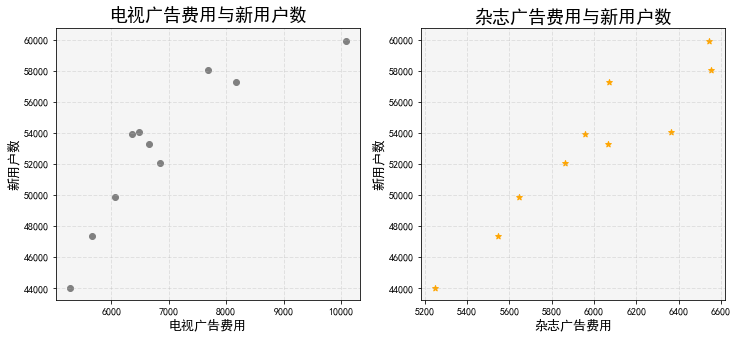

In [4]:
# 分别画出电视和杂志广告投放费用和新增用户数的散点图
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(ad_data.tvcm, ad_data.install, c='grey', marker='o')
plt.title('电视广告费用与新用户数', fontsize=18)
plt.xlabel('电视广告费用', fontsize=13)
plt.ylabel('新用户数', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.subplot(122)
plt.gca().set_facecolor('whitesmoke')
plt.scatter(ad_data.magazine, ad_data.install, c='orange', marker='*')
plt.title('杂志广告费用与新用户数', fontsize=18)
plt.xlabel('杂志广告费用', fontsize=13)
plt.ylabel('新用户数', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.show()

从散点图来看，随着投入广告费用的增加，新获得的用户数也会增加，反应在图上就是数据点不断的向右上方延伸。

### 3 进行多元回归分析

#### 3.1 构建训练集和测试集

使用百分之80的数据作为训练集，剩余百分之20的数据作为测试集

In [96]:
x_train, x_test, y_train, y_test = train_test_split(ad_data.iloc[:, 1:3], ad_data.install, train_size=0.8)

In [97]:
print('样本特征值大小：', ad_data.iloc[:, 1:3].shape,
      '训练特征值大小：', x_train.shape,
      '测试特征值大小：', x_test.shape
     )

样本特征值大小： (10, 2) 训练特征值大小： (8, 2) 测试特征值大小： (2, 2)


In [98]:
print('样本标签值大小：', ad_data.install.shape,
      '训练标签值大小：', y_train.shape,
      '训练标签值大小：', y_test.shape
     )

样本标签值大小： (10,) 训练标签值大小： (8,) 训练标签值大小： (2,)


#### 3.2 使用模型进行训练

In [99]:
# 初始化模型
model = LinearRegression()

In [100]:
# 使用训练集训练模型
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# 获取回归系数
a = model.coef_
a

array([ 1.36044499,  7.27261406])

In [102]:
# 获取截距
b = model.intercept_
b

52.192725362096098

In [103]:
print('最佳拟合线的截距为：', b, '，回归系数为：', a)

最佳拟合线的截距为： 52.1927253621 ，回归系数为： [ 1.36044499  7.27261406]


**即多元回归模型函数为：$$y=1.36tvcm+7.27magazine+52.19$$**

由于样本数据较少，所以每次更新训练集和测试集，模型变动较大，此处选择一个和书籍接近的模型进行学习。

由上述模型函数可知，如果不进行任何广告投入，每月可以增加52个新用户；给定tv广告投入，杂志广告每投入1000元，会有7270个新增用户；对于给定的magazine，电视广告每投入1000元，会有1360个新增用户。

#### 3.3 模型预测和评估

用测试集进行预测，并进行模型评估

In [105]:
# 获取决定系数
score = model.score(x_test, y_test)
score

0.99847347884068605

决定系数$R^2=0.998$，决定系数越接近1，说明模型拟合的越好。

In [138]:
# 测试集预测值
y_test_predict = model.predict(x_test)

**将测试集和预测集绘制在同一张图中**

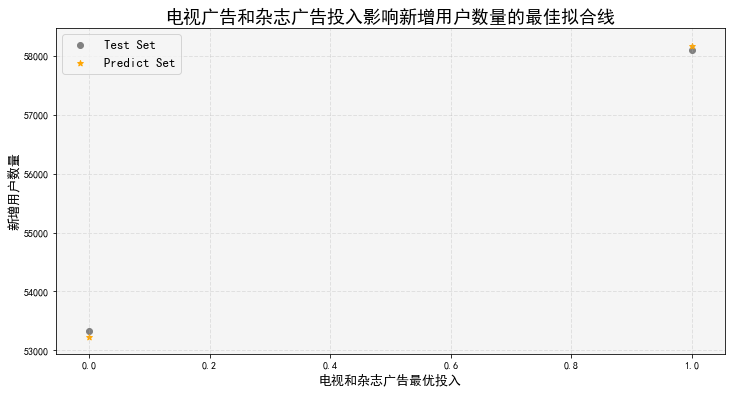

In [140]:
index_test = np.arange(y_test.size)
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('whitesmoke')
# 测试集
plt.scatter(index_test, y_test, c='grey', marker='o', label='Test Set')
# 测试集的预测集
plt.scatter(index_test, y_test_predict, c='orange', marker='*', label='Predict Set')
plt.title('电视广告和杂志广告投入影响新增用户数量的最佳拟合线', fontsize=18)
plt.xlabel('电视和杂志广告最优投入', fontsize=13)
plt.ylabel('新增用户数量', fontsize=13)
plt.grid(linestyle='--', linewidth=1, alpha=0.3)
plt.legend(facecolor='whitesmoke', fontsize=13)
plt.show()

由于测试集i较少，但是由上图可以看出，模型是非常精确的。

## 6 解决对策

本例中围绕了如下问题进行分析：
- **通过各种媒体获得的用户数量不尽相同（事实）**
- **每月获得的新用户与在电视和杂志上投放广告的比例相关（假设）**
- **把握电视广告和杂志广告费用各自与新货的用户之间的关系**
- **基于这种关系，确定一个最佳的广告分配比例**

基于上述问题设定，使用多元回归分析推导出电视广告和杂志广告与新增用户数之间的关系：$$y=1.36tvcm+7.27magazine+52.19$$

从上式可以看出，杂志广告的效果要比电视广告效果更好一些，即使采用不投放电视广告的极端行为，效果也不会太差。上述公式只适用于本例范围内的数据，对于超出本例数据范围的数据则不适用。

按如下广告费用来预测新增用户数量：**电视广告：4200万日元     杂志广告：7500万日元**

根据上述公式，可以得知$$1.36 \times (4200万日元) + 7.27 \times (7500万日元) + 52.19 = 60289人$$

也就是说，可以获取大约6万新用户。